# Explore here

In [9]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf # Formula = 'y~x'

In [10]:
url="https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/refs/heads/main/medical_insurance_cost.csv"

df=pd.read_csv(url)
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [12]:
df.groupby(by="region")["charges"].median()

region
northeast    10057.652025
northwest     8965.795750
southeast     9294.131950
southwest     8798.593000
Name: charges, dtype: float64

In [13]:
df_=df.copy()

In [14]:
# modificamos nuestros datos a numericos para su analisis

def decod_gender(str_):
  if str_=="female":
    num_=1
  else:
    num_=0
  return num_

def decod_smoker(str_):
  if str_=="yes":
    num_=1
  elif str_=="no":
    num_=0
  return num_

In [15]:
# eliminamos duplicados
df_=df_.drop_duplicates().reset_index(drop = True)

In [16]:
df_.drop(columns='region',inplace=True)

In [17]:
#a plicamos las formulas anteriores para cambiar nuestros datos a numericos en las columnas de "sex" y "smoker"

df_["sex_"] = df_["sex"].apply(decod_gender)
df_.drop("sex", axis=1,inplace=True)
df_["smokr_"]=df_["smoker"].apply(decod_smoker)
df_.drop("smoker",axis=1,inplace=True)

In [19]:
df_.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_', 'smokr_'], dtype='object')

<Axes: >

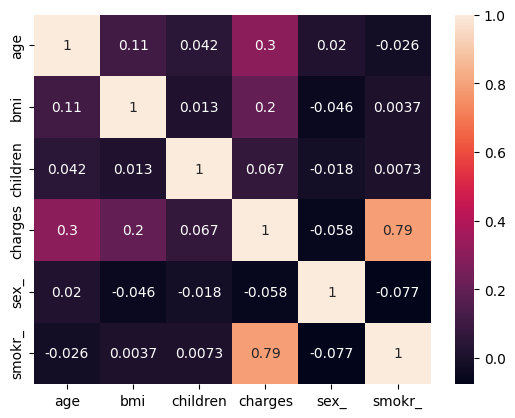

In [20]:
sns.heatmap(df_.corr(), annot=True)

In [21]:
print(smf.ols(formula='charges ~ age + bmi + children + sex_ + smokr_ ', data=df_).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     796.7
Date:                Wed, 30 Jul 2025   Prob (F-statistic):               0.00
Time:                        23:23:19   Log-Likelihood:                -13541.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1331   BIC:                         2.713e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.218e+04    964.707    -12.622      0.0